In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import requests

In [4]:
%pwd

'C:\\Users\\KOSEK\\documents\\du\\datascience\\cs3006\\Pandasexamples'

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [21]:
df = pd.read_csv('C:\\Users\\KOSEK\\documents\\du\\datascience\\cs3006\\Pandasexamples\\test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [9]:
df = pd.read_csv('C:/Users/KOSEK/documents/du/datascience/cs3006/Pandasexamples/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [10]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [11]:
#We can select just some rows:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [12]:
# or just some columns
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [13]:
# or both. We need to use the iloc attribute
# in this format:  .iloc[rows, columns]
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [15]:
#Here is another way:

df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [22]:
# we can strip the dataframe to only the columns we need
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [23]:
#since the index was redundant, we will strip it
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [24]:
# and rename the columns
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [28]:
# it is easy to find gdp per capita
df['GDP percap'] = df['total GDP'] *1e3 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,37335.653,2.950722e+05,7903.229085
Australia,19053.186,5.418047e+05,28436.433261
India,1006300.297,1.728144e+06,1717.324719
Israel,6114.570,1.292539e+05,21138.672744
Malawi,11801.505,5.026222e+03,425.896679
South Africa,45064.098,2.272424e+05,5042.647686
United States,282171.957,9.898700e+06,35080.381854
Uruguay,3219.793,2.525596e+04,7843.970619


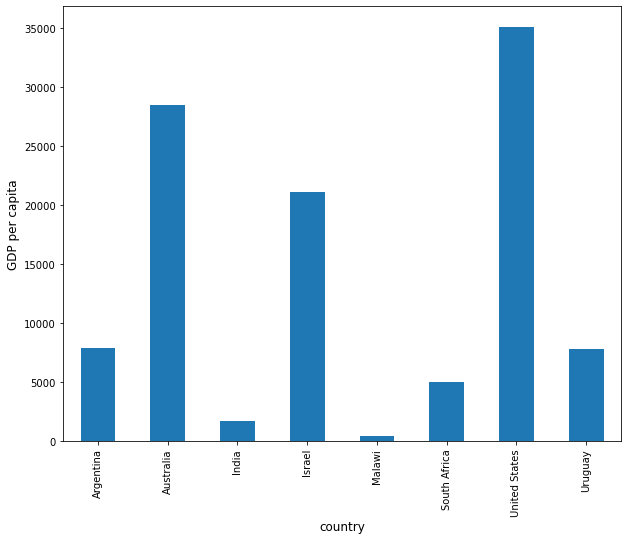

In [29]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [30]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,282171.957,9.898700e+06,35080.381854
Australia,19053.186,5.418047e+05,28436.433261
Israel,6114.570,1.292539e+05,21138.672744
Argentina,37335.653,2.950722e+05,7903.229085
Uruguay,3219.793,2.525596e+04,7843.970619
South Africa,45064.098,2.272424e+05,5042.647686
India,1006300.297,1.728144e+06,1717.324719
Malawi,11801.505,5.026222e+03,425.896679


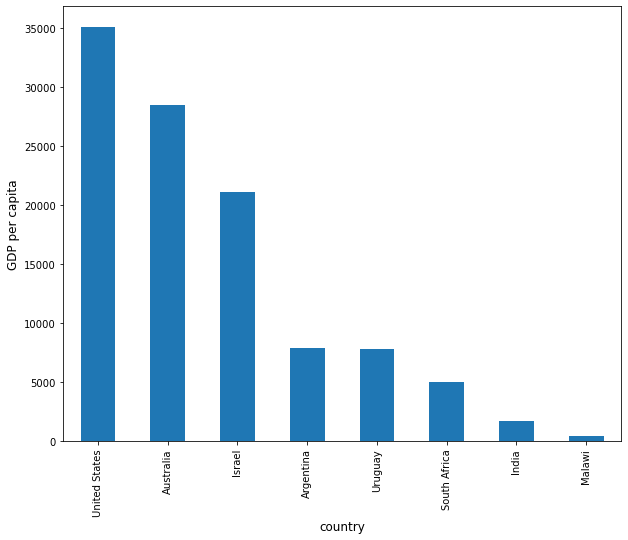

In [31]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [33]:
# On a good day, we can get some data of a website:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [34]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [37]:
source[1]

'1948-01-01,3.4\r'

In [36]:
source[2]

'1948-02-01,3.8\r'

In [39]:
#Pandas can help us with parsing this quickly
data = pd.read_csv(url, index_col=0, parse_dates=True)
type(data)

pandas.core.frame.DataFrame

In [40]:
data.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [41]:
pd.set_option('precision', 1)
data.describe()

,VALUE
count,873.0
mean,5.8
std,1.7
min,2.5
25%,4.5
50%,5.6
75%,6.8
max,14.7


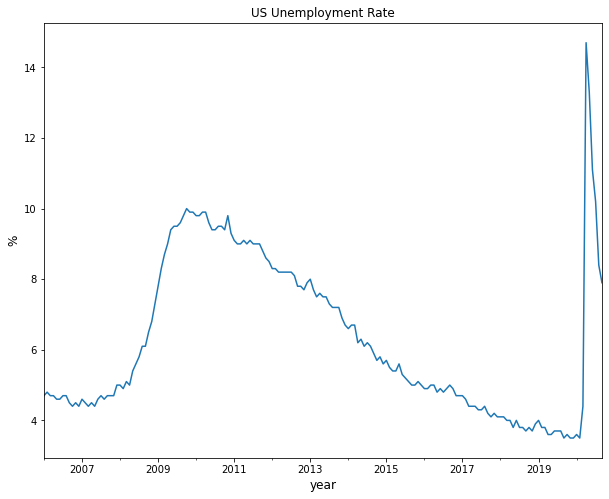

In [43]:
#We can also plot the unemployment rate from 2006 to 2020 as follows
ax = data['2006':'2020'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()